In [1]:
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np
from csbdeep.utils import Path, normalize
from segmentation import MELC_Segmentation

2023-06-01 10:22:28.127816: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-01 10:22:28.128980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 10:22:28.153805: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 10:22:28.154190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 10:22:28.555321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = "ALS"

f = open('/data_slow/je30bery/spatial_proteomics/config.json')
config = json.load(f)
data_path = config[data]
seg = MELC_Segmentation(data_path, membrane_marker="cd45") 
# membrane_marker: str/None 
# radius: multiple of cell radius

In [4]:
seg.run('ALS01 - 21297')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


2023-06-01 10:22:29.272345: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-01 10:22:29.272371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: bionets-scott.aibe.uni-erlangen.de
2023-06-01 10:22:29.272374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: bionets-scott.aibe.uni-erlangen.de
2023-06-01 10:22:29.272437: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-01 10:22:29.272449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-01 10:22:29.272452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


1/1 [==============================] - 1s 827ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4368/4368 [00:43<00:00, 100.76it/s]


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [5]:
seg.fields_of_view

['ALS01 - 21297',
 'ALS01 - 21298',
 'ALS01 - 21299',
 'ALS01 - 21300',
 'ALS02 - 21301',
 'ALS02 - 21302',
 'ALS02 - 21303',
 'ALS02 - 21304',
 'ALS03 - 21305',
 'ALS03 - 21306',
 'ALS03 - 21307',
 'ALS03 - 21308',
 'Healthy01 - 21315',
 'Healthy01 - 21316',
 'Healthy01 - 21317',
 'Healthy01 - 21318',
 'Healthy02 - 21319',
 'Healthy02 - 21320',
 'Healthy02 - 21321',
 'Healthy02 - 21322',
 'Healthy03 - 21323',
 'Healthy03 - 21324',
 'Healthy03 - 21325',
 'Healthy03 - 21326',
 'Healthy04 - 21335',
 'Healthy04 - 21336',
 'Healthy04 - 21337',
 'Healthy04 - 21338',
 'Healthy05 - 21331',
 'Healthy05 - 21332',
 'Healthy05 - 21333',
 'Healthy05 - 21334']

ALS01 - 21297
################### ALS01 - 21297 ######################
1/1 [==============================] - 1s 825ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5891/5891 [00:57<00:00, 102.83it/s]


rec took 57.291460037231445
1.1111111111111112


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4368/4368 [00:43<00:00, 101.02it/s]


est took 43.24170517921448


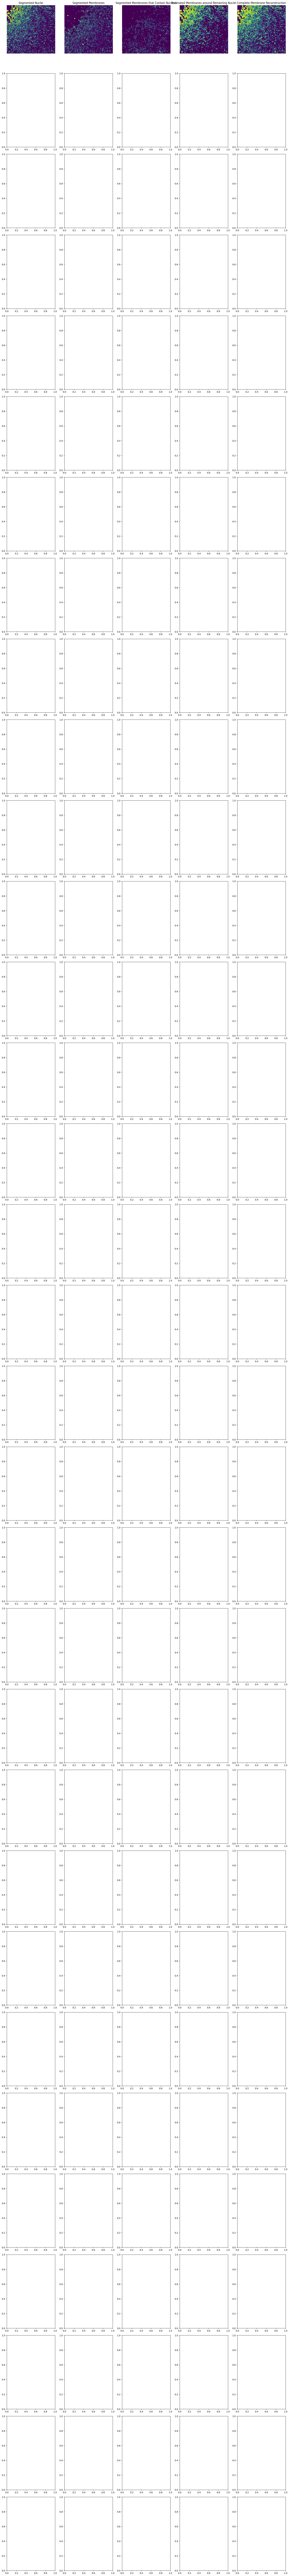

In [36]:
f, axs = plt.subplots(len(seg.fields_of_view), 5, figsize=(18, len(seg.fields_of_view) * 5))
axs[0,0].set_title("Segmented Nuclei")
axs[0,1].set_title("Segmented Membranes")
axs[0,2].set_title("Segmented Membranes that Contain Nucleus")
axs[0,3].set_title("Estimated Membranes around Remaining Nuclei")
axs[0,4].set_title("Complete Membrane Reconstruction")


for i, fow in enumerate(seg.fields_of_view[:1]):
    print(fow)
    print("###################", fow, "######################")
    seg.field_of_view = fow
    prop_iodide = seg.get_prop_iodide()
    cd45 = seg.get_membrane_marker()
    #nuclei, membranes = seg.run(seg) # radius: relative to nucleus size 
    nuclei_labels, nuclei_centers = seg.segment(prop_iodide)
    membrane_labels, membrane_centers = seg.segment(cd45)
    
    start = time.time()
    reconstructed_membranes1, nuclei_centers_without_membranes1, radius, radii = seg.existing_membranes_as_nuclei_NN(membrane_labels, nuclei_labels, nuclei_centers)
    print("rec took", time.time()-start)
    print(radius)

    start = time.time()
    estimated_membranes1 = seg.estimate_membranes_as_nuclei_NN_in_radius(nuclei_labels, nuclei_centers_without_membranes1, radius, radii)
    print("est took", time.time()-start)

    axs[i,0].imshow(nuclei_labels)
    axs[i,0].axis('off')
    plt.imsave("nuc.png", nuclei_labels, cmap="inferno")
    plt.imsave("nuc_zoom.png", nuclei_labels[1000:1250, 1000:1250], cmap="inferno")
  

    axs[i,1].imshow(membrane_labels)
    axs[i,1].axis('off')
    plt.imsave("mem_seg.png", membrane_labels, cmap="bone")
    plt.imsave("mem_seg_zoom.png", membrane_labels[1000:1250, 1000:1250], cmap="bone")
    
    axs[i,2].imshow(reconstructed_membranes1)
    axs[i,2].axis('off')
    plt.imsave("rec_mem_zoom.png", reconstructed_membranes1[1000:1250, 1000:1250], cmap="bone")
    

    axs[i,3].imshow(estimated_membranes1)
    axs[i,3].axis('off')
    plt.imsave("est_mem_zoom.png", estimated_membranes1[1000:1250, 1000:1250], cmap="bone")

        
    axs[i,4].imshow(reconstructed_membranes1 + estimated_membranes1)
    comb = (reconstructed_membranes1 + estimated_membranes1)
    plt.imsave("comb_mem_zoom.png", comb[1000:1250, 1000:1250], cmap="bone")

    axs[i,4].axis('off')


    #np.save(f"./segmentation_results/{fow}_nuclei.npy", nuclei.astype(int))
    #np.save(f"./segmentation_results/{fow}_membranes.npy", membranes.astype(int))
plt.tight_layout()
plt.show()

In [35]:
plt.imsave("comb_mem.png", comb, cmap="bone")


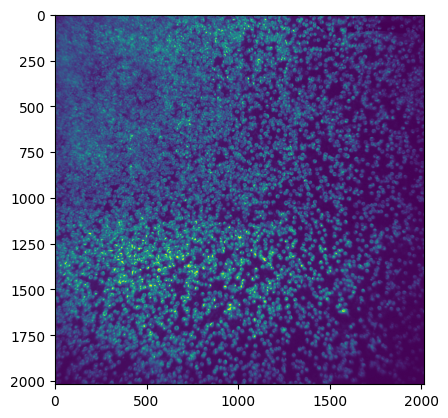

In [30]:
plt.imshow(cd45)

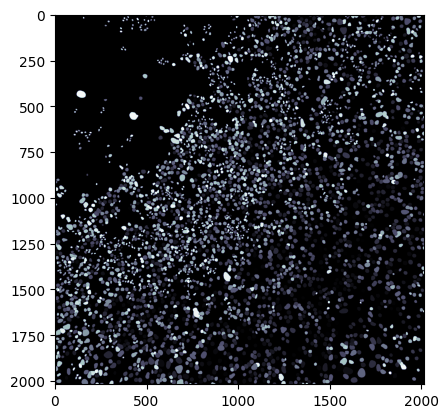

In [32]:
plt.imshow(membrane_labels, cmap="bone")

In [28]:
plt.imsave("mem_seg.png", membrane_labels, cmap="inferno")

In [14]:
plt.imsave("rec_mem_zoom.png", reconstructed_membranes1[1000:1200, 1000:1200], cmap="inferno")

In [16]:
plt.imsave("nuc_zoom.png", prop_iodide[1000:1200, 1000:1200], cmap="inferno")

In [7]:
crash

NameError: name 'crash' is not defined

In [ ]:
prop_iodide = seg.get_prop_iodide()
cd45 = seg.get_membrane_marker()

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].axis('off')
axs[0, 0].imshow(prop_iodide)
axs[0, 0].set_title("Propidium Iodide - Bleach Image")
axs[0, 1].axis('off')
axs[0, 1].imshow(cd45)
axs[0, 1].set_title("CD45")
axs[1, 0].axis('off')
axs[1, 0].imshow(prop_iodide[:250, :250])
axs[1, 1].axis('off')
axs[1, 1].imshow(cd45[:250, :250])
plt.show()

In [ ]:
nuclei_labels, nuclei_centers = seg.segment(prop_iodide)
membrane_labels, membrane_centers = seg.segment(cd45)

In [ ]:
seg.field_of_view = 'ALS01 - 21297' 

In [ ]:
plt.imshow(reconstructed_membranes)

In [ ]:
radius

In [ ]:
test = cv2.circle(np.zeros_like(nuclei_labels), (42, 236), 23, 1, -1) 
plt.imshow(test)

In [ ]:
np.sqrt(1793)/np.pi

In [ ]:
np.sum(reconstructed_membranes == 5385)

In [ ]:
22.522164124616 ** 2 * np.pi

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].axis('off')
axs[0,0].imshow(nuclei_labels)
axs[0,0].set_title("Propidium Iodide Segmentation")
axs[0,1].axis('off')
axs[0,1].imshow(membrane_labels)
axs[0,1].set_title("CD45 Segmentation")
axs[1,0].axis('off')
axs[1,0].imshow(nuclei_labels[:250, :250])
axs[1,1].axis('off')
axs[1,1].imshow(membrane_labels[:250, :250])
plt.show()

In [ ]:
import time
start = time.time()
reconstructed_membranes1, nuclei_centers_without_membranes1 = seg.existing_membranes_as_nuclei_NN(membrane_labels, nuclei_labels, nuclei_centers)
print("rec took", time.time()-start)

start = time.time()
radius = seg.estimate_radius(nuclei_labels, reconstructed_membranes1)
print("radius took", time.time()-start)

start = time.time()
estimated_membranes1 = seg.estimate_membranes_as_nuclei_NN_in_radius(nuclei_labels, nuclei_centers_without_membranes1, radius)
print("est took", time.time()-start)

In [23]:
plt.imsave("nuc_zoom.png", nuclei_labels[1000:1250, 1000:1250], cmap="inferno")

In [ ]:
print(np.sum(nuclei_labels==1))

In [ ]:
plt.plot(ratio)

In [ ]:
np.mean(ratio)

In [ ]:
median_radius

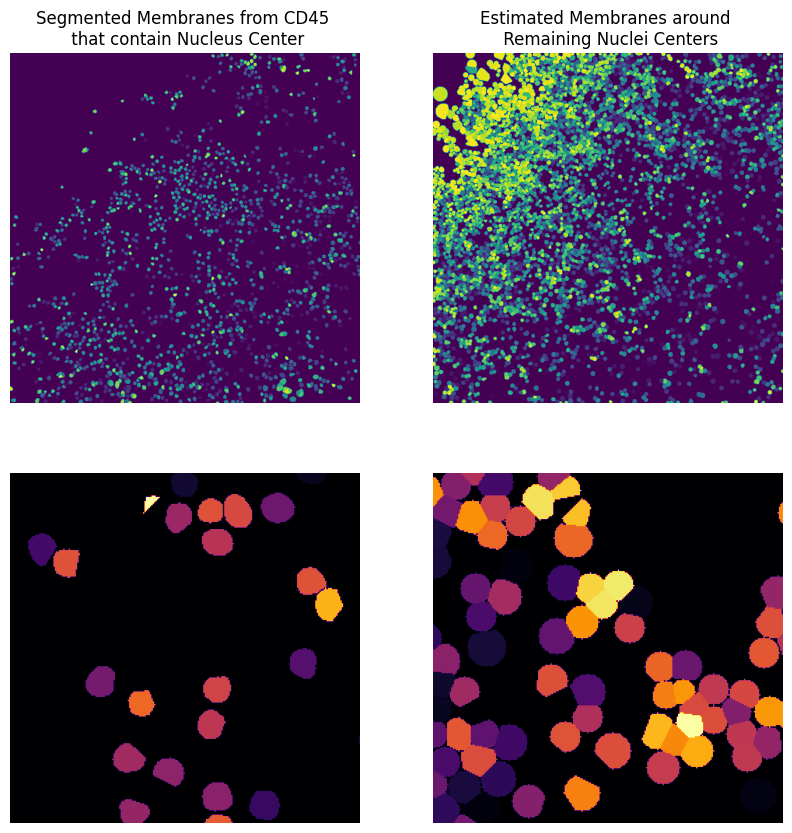

In [22]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].axis('off')
axs[0,0].imshow(reconstructed_membranes1)
axs[0,0].set_title("Segmented Membranes from CD45 \n that contain Nucleus Center")
axs[0,1].axis('off')
axs[0,1].imshow(estimated_membranes1)
axs[0,1].set_title("Estimated Membranes around \n Remaining Nuclei Centers")
axs[1,0].axis('off')
axs[1,0].imshow(reconstructed_membranes1[1000:1250, 1000:1250], cmap="inferno")
plt.imsave("rec_zoom.png", reconstructed_membranes1[1000:1250, 1000:1250], cmap="inferno")

axs[1,1].axis('off')
axs[1,1].imshow(estimated_membranes1[1000:1250, 1000:1250], cmap="inferno")
plt.imsave("est_zoom.png", estimated_membranes1[1000:1250, 1000:1250], cmap="inferno")

plt.show()

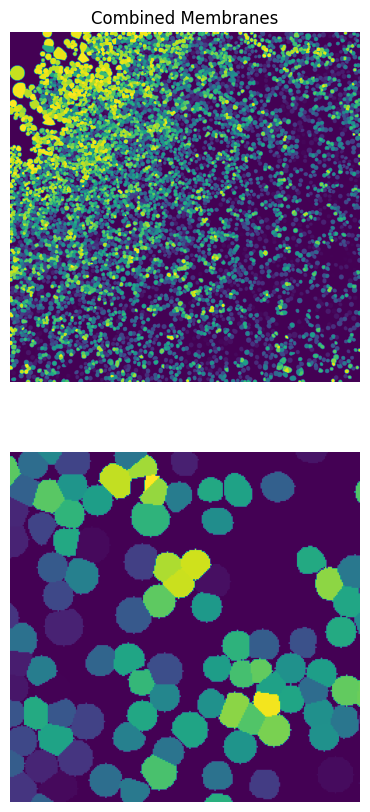

In [26]:
combined_membranes = reconstructed_membranes1 + estimated_membranes1
f, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].axis('off')
axs[0].imshow(combined_membranes)
axs[0].set_title("Combined Membranes")

axs[1].imshow(combined_membranes[1000:1250, 1000:1250])
plt.imsave("comb_zoom.png", combined_membranes[1000:1250, 1000:1250], cmap="inferno")

axs[1].axis('off')
plt.show()

In [ ]:
start = time.time()
reconstructed_membranes2, nuclei_centers_without_membranes2 = seg.existing_membranes_as_nuclei_NN2(membrane_labels, nuclei_labels, nuclei_centers)
print("rec took", time.time()-start)

start = time.time()
radius = seg.estimate_radius(nuclei_labels, reconstructed_membranes2)
print("radius took", time.time()-start)

start = time.time()
estimated_membranes2 = seg.estimate_membranes_as_nuclei_NN_in_radius2(nuclei_labels, nuclei_centers_without_membranes2, radius)
print("est took", time.time()-start)

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].axis('off')
axs[0,0].imshow(reconstructed_membranes2)
axs[0,0].set_title("Segmented Membranes from CD45 \n that contain Nucleus Center")
axs[0,1].axis('off')
axs[0,1].imshow(estimated_membranes2)
axs[0,1].set_title("Estimated Membranes around \n Remaining Nuclei Centers")
axs[1,0].axis('off')
axs[1,0].imshow(reconstructed_membranes2[:250, :250])
axs[1,1].axis('off')
axs[1,1].imshow(estimated_membranes2[:250, :250])
plt.show()

In [ ]:
only_membranes = combined_membranes != nuclei_labels
f, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].axis('off')
axs[0].imshow(only_membranes)
axs[0].set_title("Combined Membranes")

axs[1].imshow(only_membranes[:250, :250])
axs[1].axis('off')
plt.show()